# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# Author:Samiksha Adsule


# Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

C:\Users\my lappy\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the Dataset

In [2]:
df=pd.read_excel("Task1.xlsx")
print("Data imported successfully")

Data imported successfully


In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Checking total no. rows and no.of columns

In [4]:
df.shape

(25, 2)

# Data Preprocessing and EDA

# Checking datatypes of all the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Summary of the whole Dataset

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking correlation

In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Graphical Representation

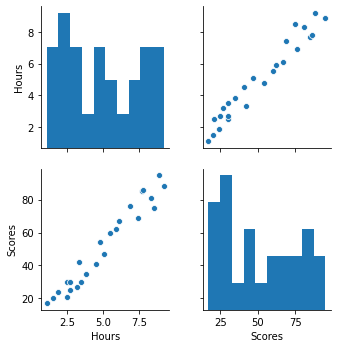

In [8]:
sb.pairplot(df)

# Plotting the distribution of scores

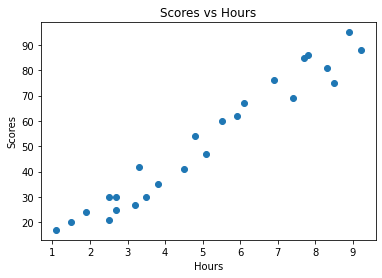

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df.Hours,df.Scores)
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.title("Scores vs Hours")
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Defining X and Y variables

In [10]:
X=df[['Hours']]

Y=df[['Scores']]

# Splitting Data into Training and Testing set 

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

# Training the Algorithm/ Building a model

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

print("Training complete.")

Training complete.


In [14]:
ytest["predictedScores"]=pred

In [15]:
ytest

,Scores,predictedScores
10,85,76.971740
16,30,27.171723
19,69,74.098662
0,21,27.171723
23,76,69.310199


# Plotting the regression line

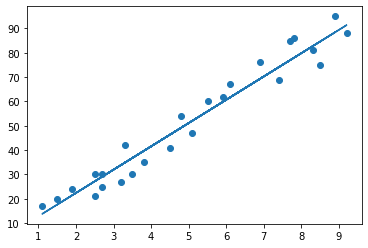

In [16]:
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

# Making Predictions

Now that we have trained our algorithm/moedel, it's time to make some predictions.

In [17]:
print(xtest) # Testing data - In Hours
Y_pred = lr.predict(xtest) # Predicting the scores

    Hours
10    7.7
16    2.5
19    7.4
0     2.5
23    6.9


# Comparing Actual vs Predicted

In [18]:
#df = pd.DataFrame({'Actual': ytest, 'Predicted': Y_pred}) 

ytest["predictedScores"]=pred
ytest

,Scores,predictedScores
10,85,76.971740
16,30,27.171723
19,69,74.098662
0,21,27.171723
23,76,69.310199


In [19]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest['Scores'],ytest['predictedScores'])
print("Overall model error is %.2f"%MAE) 


Overall model error is 5.76
